In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Finding the Best Markets to Advertise In



<p>The premise of the project is to assume we are a e-learning company and want to find the best market to advertise in. Our fictive e-learning company offer courses on programming as well as other related domains such as data science and game developement.</p>
<p>We use the data from the <a href = 'https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/'>freeCodeCamp's 2017 New Coder Surevy </a>. The data is available at <a href = 'https://github.com/freeCodeCamp/2017-new-coder-survey'>this GitHub repository</a>.</p>

In [2]:
Survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',dtype = {'JobInterestOther':str, 'CodeEventOther':str})
pd.options.display.max_columns = 150
Survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

<p>An error was thrown that column 17 and 62 comprise different data types. After taking a look at these columns, I set `dtypes` to str while reading the data set in.</p>
<p>136 columns are obviously more than we need. Hence the next step is to filter for relevant columns. The questions we would like to find answers to are: </p>
<ul> 
<li>Where are these new coders located. </li>
<li>What are the locations with the greatest number of new coders.</li>
<li>How much money new coders are willing to spend on learning</li>
</ul>.
<p>Before the analysis starts, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose</p>

In [3]:
Survey['JobRoleInterest'].value_counts(normalize = True)*100

Full-Stack Web Developer                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                                                                                  

<p>The frequency table above shows that most people are interested in</p>
<ul>
<li> full stack, front end, and back end web developer,</li>
<li> data scientist,</li>
<li> mobile developter.</li>
</ul>
There are many answers with multiple job interests. Next, we split the answers with multiple job interests and perform the frequency table again:

In [4]:
JobRoleInterest_series = Survey['JobRoleInterest'].str.split(pat=',',expand = True).melt()['value'].str.strip().str.lower().dropna()

In [5]:
JobRoleInterest_series.value_counts(normalize = True)*100

full-stack web developer                                                                     18.575221
front-end web developer                                                                      15.632743
back-end web developer                                                                       12.265487
mobile developer                                                                             10.199115
data scientist                                                                                7.269912
game developer                                                                                7.203540
user experience designer                                                                      6.500000
information security                                                                          5.867257
data engineer                                                                                 5.522124
devops / sysadmin                                                        

<p>It becomes very clear that full stack or front and back end web developer is the most popular jobs, followed by mobile developer and data scientists.</p>


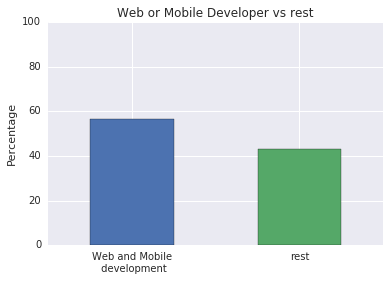

In [6]:
web_and_mobile = JobRoleInterest_series.str.contains('web developer|mobile developer').value_counts(normalize = True)*100
web_and_mobile.plot.bar()
plt.title('Web or Mobile Developer vs rest')
plt.ylabel('Percentage')
plt.xticks([0,1],['Web and Mobile\n development','rest'], rotation = 0)
plt.ylim([0,100])
plt.show()

<p>How many answered more than one option?</p>

In [7]:
number_options = Survey['JobRoleInterest'].dropna().str.split(pat=',').apply(lambda x:len(x))
number_options.value_counts(normalize = True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

<p>Only around 32% have given one job title as answer. However, we droped the `NaN`.</p>


## Locations and Densitites
Our next aim is to investigate the locations of the people who took part in the survey. The columns `CountryCitizen` and `CountryLive` discribe the country of origin and the country the participant live in, respectively. For the analysis, `CountryLive` is of greater interest.

In [8]:
Survey[['CountryCitizen','CountryLive']].head(3)

,CountryCitizen,CountryLive
0,Canada,Canada
1,United States of America,United States of America
2,United States of America,United States of America


In [9]:
abs_freq = Survey[~(Survey['JobRoleInterest'].isnull())]['CountryLive'].value_counts()
norm_freq = Survey[~(Survey['JobRoleInterest'].isnull())]['CountryLive'].value_counts(normalize = True)

In [10]:
pd.DataFrame(data = {'absolute frequencies': abs_freq, 'relative frequencies':norm_freq}).head()

,absolute frequencies,relative frequencies
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158


The USA is by far the biggest market. However, are people willing to spend money?

## Willingness to spend money
<p>Will people in the bigger market spend money on online courses? Our fictive company charges \$59 per month. Therefore, we want to know how much people are willing to spend per month. We will look at countries, of which the official language is English: </p>

In [11]:
Survey['MoneyForLearning'].head()

0     150.0
1      80.0
2    1000.0
3       0.0
4       0.0
Name: MoneyForLearning, dtype: float64

In [12]:
countries = Survey[Survey['CountryLive'].isin(['United States of America','India','United Kingdom','Canada'])].copy()

In [13]:
countries['MonthsProgramming'].replace(0,1, inplace = True)
countries['spent per month'] = countries['MoneyForLearning']/countries['MonthsProgramming']

In [14]:
countries['spent per month'].isnull().sum()

596

In [15]:
countries = countries[~(countries['spent per month'].isnull())]
countries_mean = countries.groupby('CountryLive').mean()
countries_mean[['spent per month']].sort_values(by = 'spent per month', ascending = False)

,spent per month
CountryLive,
United States of America,206.297711
Canada,118.434054
India,66.526198
United Kingdom,55.774980


The participants from the USA are willing to pay most per month, followed by participants from Canada and India. It is rather surprising that the the amount spent in the UK is rather low in comparison. Maybe the data we have is not representable?

## Are there outliers?
<p> We will visualise our findings and look how the data is distributed.</p>

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



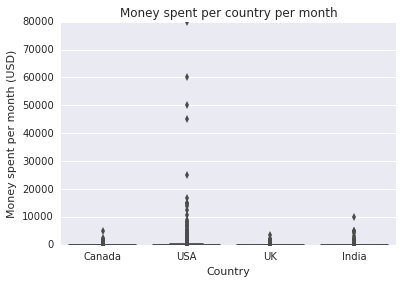

In [16]:
sns.boxplot(y = 'spent per month', x = 'CountryLive', data = countries)
plt.title('Money spent per country per month')
plt.ylabel('Money spent per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['Canada', 'USA','UK', 'India'])
plt.show()

<p>We immediately see that something is odd in the data of the USA. There are people who spent more than \$400000 per month. This seems a bit much and rather unlikely.</p>
Therefore, we will think of these as outliers and exclude them from our analysis. Henceforth, we will discard all people, who claim to have spent more than \$20000 per month:

In [17]:
countries = countries[countries['spent per month']<=20000].copy()
countries_mean = countries.groupby('CountryLive').mean()
countries_mean[['spent per month']].sort_values(by = 'spent per month', ascending = False)

,spent per month
CountryLive,
United States of America,158.919644
Canada,118.434054
India,66.526198
United Kingdom,55.774980


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



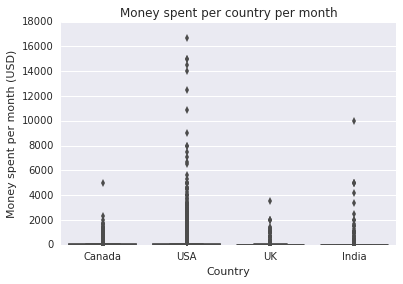

In [18]:
sns.boxplot(y = 'spent per month', x = 'CountryLive', data = countries)
plt.title('Money spent per country per month')
plt.ylabel('Money spent per month (USD)')
plt.xlabel('Country')
plt.xticks(range(4), ['Canada', 'USA','UK', 'India'])
plt.show()

We see a an outlier in India. However, we still can't say whether the data is a good representation. It seems that many participants in the USA spent quite some money per month. It worth looking at the median of these 4 countries:

In [19]:
countries = countries[countries['spent per month']<=20000].copy()
countries_median = countries.groupby('CountryLive').median()
countries_median[['spent per month']].sort_values(by = 'spent per month', ascending = False)

,spent per month
CountryLive,
United States of America,4.166667
Canada,1.631944
United Kingdom,0.962963
India,0.000000


Let's look at a value count for India:

In [24]:
countries[countries['CountryLive'] == 'India']['spent per month'].value_counts()

0.000000       695
8.333333        22
16.666667       21
4.166667        19
12.500000       16
100.000000      14
50.000000       14
1.666667        13
20.000000       13
3.333333        13
33.333333       12
41.666667       11
166.666667      11
2.777778        10
10.000000       10
1000.000000      9
2.500000         8
2.000000         7
25.000000        7
1.388889         7
1.250000         7
5.000000         7
83.333333        6
0.416667         6
0.833333         6
250.000000       6
20.833333        6
125.000000       6
6.666667         5
400.000000       5
              ... 
208.333333       1
111.111111       1
277.777778       1
0.344828         1
4.291667         1
1.300000         1
3.472222         1
0.606061         1
58.333333        1
2.291667         1
3.857143         1
1.176471         1
18.750000        1
2500.000000      1
5.434783         1
65.571429        1
1.886792         1
625.000000       1
4.615385         1
9.166667         1
0.694444         1
44.444444   

The value count shows that most participants from India subscribed to free courses. 

## Conclusion
<p> The analysis showed that the best market for adverts for our fictive company is the USA. We looked at the what are the most desired job titles and the willingness to spend money per country.</p>
<p>